<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/HPfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#提出内容
#①米を対象にして課題を解きます。
#②英・日・仏・独も分析の対象にしました。
#③個人的な関心からλごとでHPフィルターはどのように変化するのか可視化しました。

In [3]:
#ライブラリのインポート
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np
#期間の設定
# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'

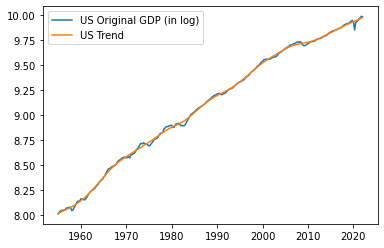

In [4]:
#米国のデータに対するHP filter
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
log_gdp = np.log(gdp)

# calculate the quarterly percent change in real GDP
gdp_pct_change = gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_gdp, label="US Original GDP (in log)")

# Plot the trend component
plt.plot(trend, label="US Trend")

# Add a legend and show the plot
plt.legend()
plt.show()


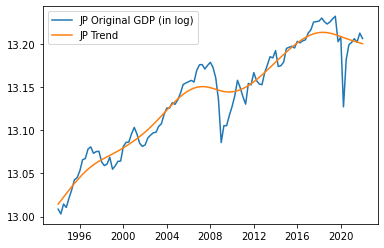

In [5]:
#日本の場合
# 日本のGDPデータを取得するためのFREDコード
japan_gdp_code = 'JPNRGDPEXP'

# 日本のGDPデータをFREDから取得
japan_gdp = web.DataReader(japan_gdp_code, 'fred', start_date, end_date)
log_japan_gdp = np.log(japan_gdp)

# calculate the quarterly percent change in real GDP
japan_gdp_pct_change = japan_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
japan_cycle, japan_trend = sm.tsa.filters.hpfilter(log_japan_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_japan_gdp, label="JP Original GDP (in log)")

# Plot the trend component
plt.plot(japan_trend, label="JP Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

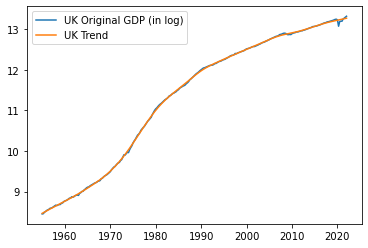

In [6]:
#英国の場合
# イギリスのGDPデータを取得するためのFREDコード
uk_gdp_code = 'UKNGDP'  # または 'UKNGDP' など

# イギリスのGDPデータをFREDから取得
uk_gdp = web.DataReader(uk_gdp_code, 'fred', start_date, end_date)
log_uk_gdp = np.log(uk_gdp)

# calculate the quarterly percent change in real GDP
uk_gdp_pct_change = uk_gdp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
uk_cycle, uk_trend = sm.tsa.filters.hpfilter(log_uk_gdp, lamb=1600)

# Plot the original time series data
plt.plot(log_uk_gdp, label="UK Original GDP (in log)")

# Plot the trend component
plt.plot(uk_trend, label="UK Trend")

# Add a legend and show the plot
plt.legend()
plt.show()

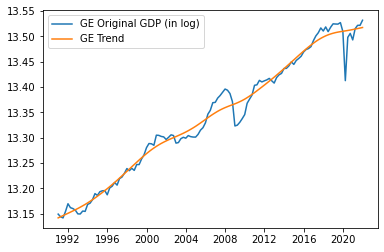

In [7]:
#独国の場合
#ドイツのGDPデータコード
germany_gdp_code = 'CLVMNACSCAB1GQDE'  # ドイツのGDPコード

# ドイツのGDPデータをFREDから取得
germany_gdp = web.DataReader(germany_gdp_code, 'fred', start_date, end_date)
log_germany_gdp = np.log(germany_gdp)

# 四半期毎の実質GDPのパーセンテージ変化を計算
germany_gdp_pct_change = germany_gdp.pct_change(4)

# Hodrick-Prescottフィルターを適用して循環成分を抽出
germany_cycle, germany_trend = sm.tsa.filters.hpfilter(log_germany_gdp, lamb=1600)

# 元の時系列データをプロット
plt.plot(log_germany_gdp, label="GE Original GDP (in log)")

# トレンド成分をプロット
plt.plot(germany_trend, label="GE Trend")

# 凡例を追加してプロットを表示
plt.legend()
plt.show()

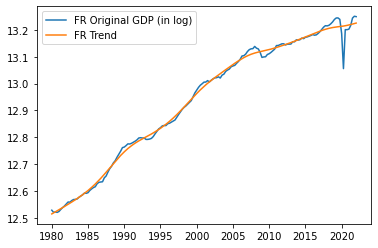

In [8]:
#仏国の場合
# フランスのGDPデータコード
france_gdp_code = 'CLVMNACSCAB1GQFR'  # フランスのGDPコード

# フランスのGDPデータをFREDから取得
france_gdp = web.DataReader(france_gdp_code, 'fred', start_date, end_date)
log_france_gdp = np.log(france_gdp)

# 四半期毎の実質GDPのパーセンテージ変化を計算
france_gdp_pct_change = france_gdp.pct_change(4)

# Hodrick-Prescottフィルターを適用して循環成分を抽出
france_cycle, france_trend = sm.tsa.filters.hpfilter(log_france_gdp, lamb=1600)

# 元の時系列データをプロット
plt.plot(log_france_gdp, label="FR Original GDP (in log)")

# トレンド成分をプロット
plt.plot(france_trend, label="FR Trend")

# 凡例を追加してプロットを表示
plt.legend()
plt.show()

In [9]:
# 1995年以降のデータにフィルタリング(日本のデータに合わせるため)
jp_cycle_filtered = japan_cycle[japan_cycle.index >= '1995-01-01']
uk_cycle_filtered = uk_cycle[uk_cycle.index >= '1995-01-01']
us_cycle_filtered = cycle[cycle.index >= '1995-01-01']
ge_cycle_filtered = germany_cycle[germany_cycle.index >= '1995-01-01']
fr_cycle_filtered = france_cycle[france_cycle.index >= '1995-01-01']
# データフレームの作成
df_list = [jp_cycle_filtered, uk_cycle_filtered, us_cycle_filtered, ge_cycle_filtered, fr_cycle_filtered]
# データフレームの結合
combined_df = pd.concat(df_list, axis=1)
# 列名の設定
combined_df.columns = ['JP', 'UK', 'US', 'GE', 'FR']
# データフレームの表示
combined_df.head()

,JP,UK,US,GE,FR
DATE,,,,,
1995-01-01,-0.009096,-0.010620,-0.000337,0.001553,0.002296
1995-04-01,-0.003601,-0.013232,-0.006185,0.005284,0.004060
1995-07-01,0.004233,-0.007648,-0.006737,0.003431,0.000652
1995-10-01,0.003048,-0.005423,-0.009186,0.000048,-0.004920
1996-01-01,0.007569,-0.001595,-0.011124,-0.012055,-0.003390


In [10]:
#データの概要
combined_df.describe()


,JP,UK,US,GE,FR
count,109.000000,109.000000,109.000000,109.000000,109.000000
mean,0.000416,-0.000056,0.000014,0.000058,-0.000104
std,0.016222,0.021551,0.013779,0.017736,0.019668
min,-0.080145,-0.152126,-0.087124,-0.098196,-0.158212
25%,-0.008423,-0.007648,-0.005961,-0.006651,-0.006234
50%,0.001873,-0.000083,-0.000337,0.000048,-0.001650
75%,0.011363,0.009427,0.007742,0.011192,0.009835
max,0.029389,0.047787,0.023707,0.036700,0.033419


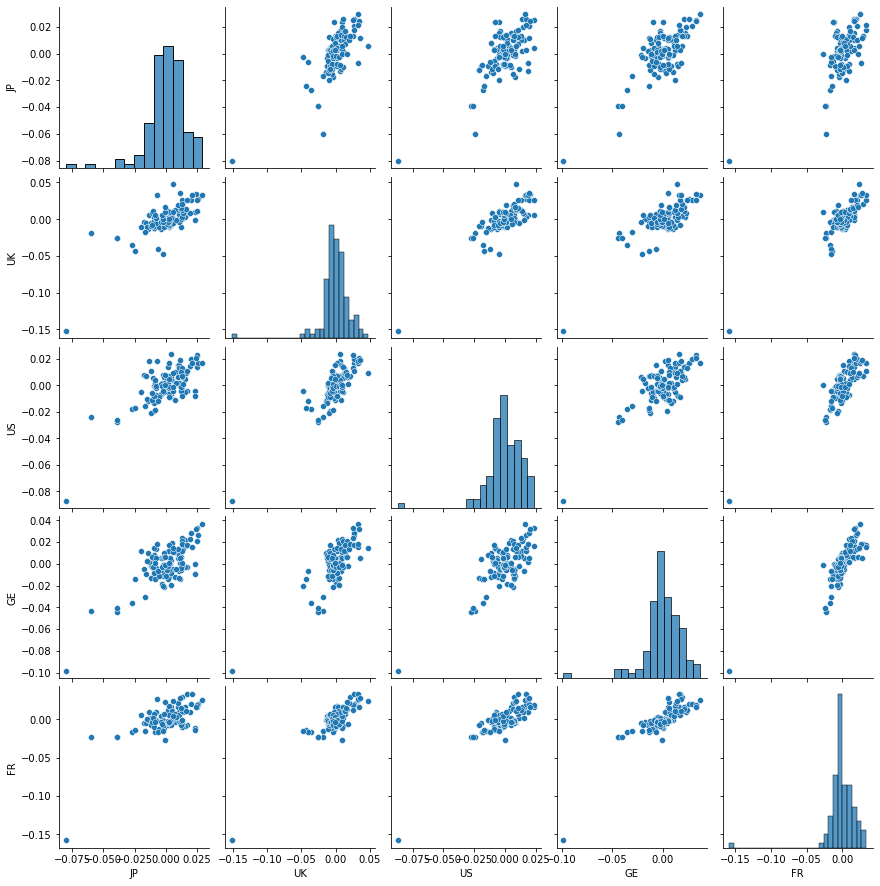

In [11]:
#相関関係
import seaborn as sns

# 散布図行列の作成
sns.pairplot(combined_df)
plt.show()

In [12]:
# データフレームの相関係数を計算
correlation_matrix = combined_df.corr()

# 相関係数の表示
print("相関係数:")
print(correlation_matrix)

相関係数:
          JP        UK        US        GE        FR
JP  1.000000  0.734795  0.728538  0.730786  0.670722
UK  0.734795  1.000000  0.833978  0.776237  0.868363
US  0.728538  0.833978  1.000000  0.746453  0.840274
GE  0.730786  0.776237  0.746453  1.000000  0.843485
FR  0.670722  0.868363  0.840274  0.843485  1.000000


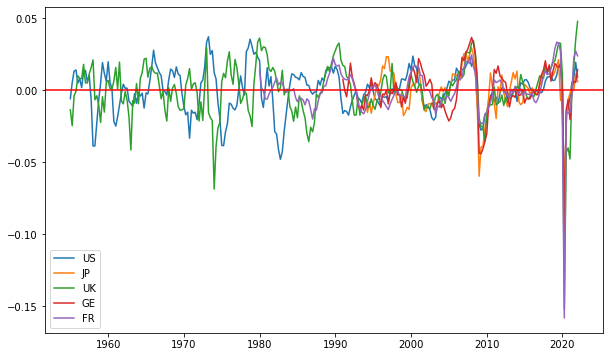

Cycle mean: 2.22691753513363e-13
Cycle standard deviation: 0.01538272676766542


In [13]:
# Plot the cycle component
plt.figure(figsize=(10, 6))
plt.plot(cycle, label="US")
plt.plot(japan_cycle, label="JP")
plt.plot(uk_cycle, label="UK")
plt.plot(germany_cycle, label="GE")
plt.plot(france_cycle, label="FR")
plt.axhline(0, color='red')
# Add a legend and show the plot
plt.legend()
plt.show()

cycle_mean = cycle.mean()
cycle_std = cycle.std()

print("Cycle mean:", cycle_mean)
print("Cycle standard deviation:", cycle_std)


In [14]:
#相関係数計算
correlation_coefficient = jp_cycle_filtered.corr(uk_cycle_filtered)
print("日本とイギリスの景気循環相関係数(1995年以降)")
print(correlation_coefficient)

日本とイギリスの景気循環相関係数(1995年以降)
0.7347953046230254


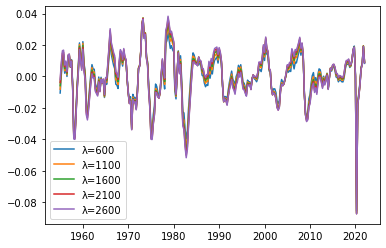

λに対する推定結果は頑健


In [15]:
#λごとで推定結果はどのように変化するのか？
# 米国のデータを使用
# λを500ごとに変えて5つデータを作成
cycle1, trend1 = sm.tsa.filters.hpfilter(log_gdp, lamb=600)
cycle2, trend2 = sm.tsa.filters.hpfilter(log_gdp, lamb=1100)
cycle3, trend3 = sm.tsa.filters.hpfilter(log_gdp, lamb=1600)
cycle4, trend4 = sm.tsa.filters.hpfilter(log_gdp, lamb=2100)
cycle5, trend5 = sm.tsa.filters.hpfilter(log_gdp, lamb=2600)
# Plot the cycle component
plt.plot(cycle1, label="λ=600")
plt.plot(cycle2, label="λ=1100")
plt.plot(cycle3, label="λ=1600")
plt.plot(cycle4, label="λ=2100")
plt.plot(cycle5, label="λ=2600")
# Add a legend and show the plot
plt.legend()
plt.show()
print("λに対する推定結果は頑健")